In [5]:
# Ejercicio. Del archivo fve32.mat

import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx

In [7]:
math_fve32 = "/Users/marianazuniga/Downloads/BCT/2019_03_03_BCT/data_and_demos/fve32.mat"

math_fve32 = scipy.io.loadmat(math_fve32)
math_fve32

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 16:26:48 2007',
 '__version__': '1.0',
 '__globals__': [],
 'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'],
       dtype='<U4'),
 'CIJ': array([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)}

Muestra el heatmap de la matriz de activación

Text(0.5, 1.0, 'Heatmap de CIJ')

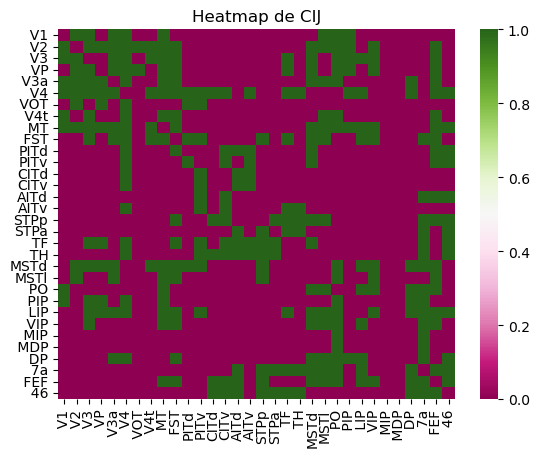

In [9]:
CIJ = math_fve32['CIJ']
names = math_fve32['Names']
heatmap_CIJ= sns.heatmap(CIJ, xticklabels=names, yticklabels=names, cmap= 'PiYG')
plt.title('Heatmap de CIJ')

Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)

Text(0.5, 1.0, 'Grafo')

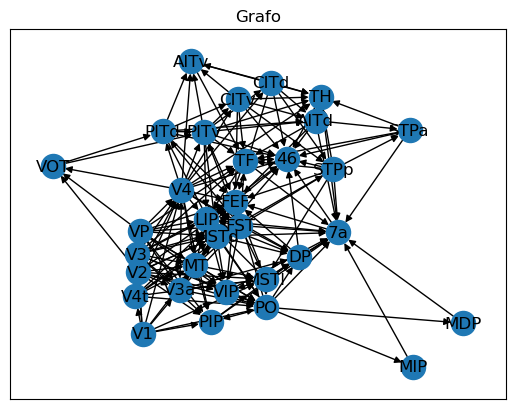

In [11]:
nombres = math_fve32['Names'].flatten()

G = nx.from_numpy_array(CIJ)
mapping = {i: name.strip() for i, name in enumerate(nombres)}  # Eliminar espacios en blanco
G = nx.relabel_nodes(G, mapping)

# 1. Grafo normal
nx.draw_networkx(G, arrows=True, arrowstyle = "-|>")
plt.title('Grafo')


Text(0.5, 1.0, 'Grafo Shell ')

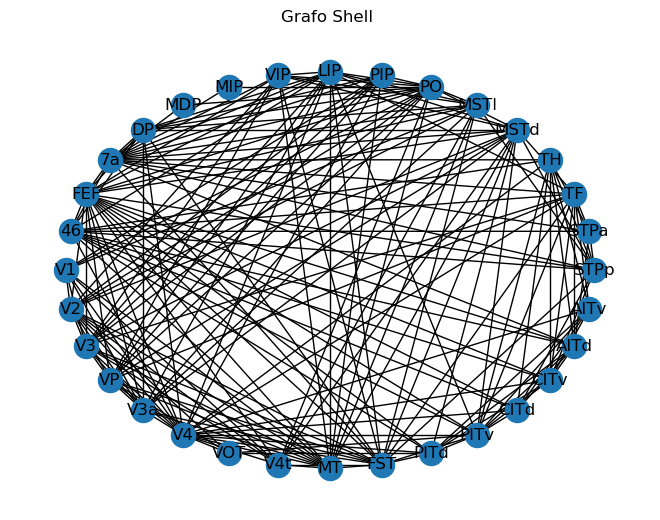

In [13]:
shell_grafo = nx.shell_layout(G)
nx.draw(G, pos=shell_grafo, with_labels=True)
plt.title("Grafo Shell ")

Text(0.5, 1.0, 'Grafo Kamada-Kawai')

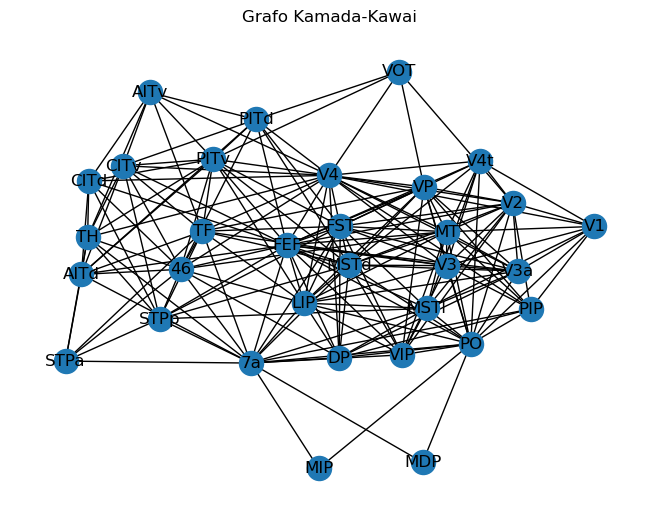

In [15]:
kk_layout = nx.kamada_kawai_layout(G)
nx.draw(G, pos=kk_layout, with_labels=True)
plt.title("Grafo Kamada-Kawai")

Text(0.5, 1.0, 'Grafo Spring ')

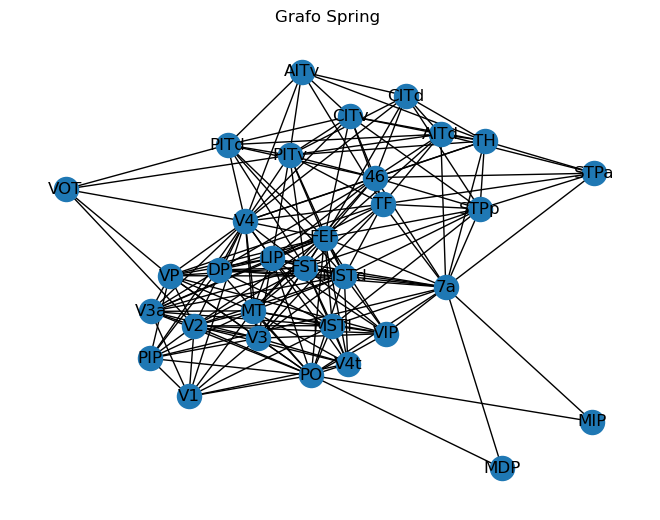

In [17]:
force_layout = nx.spring_layout(G)
nx.draw(G, pos=force_layout, with_labels=True)
plt.title("Grafo Spring ")

In [ ]:
Determina el nodo con mayores conexiones

In [23]:
G = nx.from_numpy_array(CIJ, create_using=nx.DiGraph)  
G_cij = nx.relabel_nodes(G, mapping)
degrees = dict(G_cij.degree())

# Calcular el grado de entrada y de salida para cada nodo
in_degrees = dict(G_cij.in_degree())
out_degrees = dict(G_cij.out_degree())

# Calcular el nodo con más conexiones (grado total)
total_degrees = {node: in_degrees[node] + out_degrees[node] for node in G_cij.nodes}

# Encontrar el nodo con el mayor número de conexiones
max_node = max(total_degrees, key=total_degrees.get)


# Mostrar el nombre del nodo con más conexiones
print(f"El nodo con más conexiones es: {max_node}")


El nodo con más conexiones es: V4


Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

In [21]:
max_connections = total_degrees[max_node]

# Mostrar el nombre del nodo con más conexiones
print(f"El grado del nodo V4 es de: {max_connections}")

El grado del nodo V4 es de: 39
